In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import LassoCV
from sklearn.model_selection import RepeatedKFold
import numpy as np
from numpy import arange
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
from statsmodels.formula.api import ols
from scipy import stats
import plotly.express as px

import warnings
warnings.filterwarnings('ignore')

In [2]:
Venta = pd.read_csv('C:/Users/balvi/Desktop/Data Science/Modulo 4/VENTAFLORIDALIMPIO070923VFCOLS.csv',encoding='latin-1')

In [3]:
Venta.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9094 entries, 0 to 9093
Columns: 171 entries, zpid to County
dtypes: float64(84), int64(3), object(84)
memory usage: 11.9+ MB


In [4]:
Venta.columns

Index(['zpid', 'bedrooms', 'bathrooms', 'price', 'yearBuilt', 'zipcode',
       'livingArea', 'livingAreaValue', 'zestimate', 'zestimateLowPercent',
       ...
       'PRICEsqfPriceHist', 'PRICEchangeRatePriceHist', 'EventPriceHist',
       'description', 'detailUrl_InfoTOD', 'isPreforeclosureAuction_InfoTOD',
       'isZillowOwned_InfoTOD', 'taxAssessedValue_InfoTOD',
       'price_to_rent_ratio_InfoTOD', 'County'],
      dtype='object', length=171)

In [5]:
Venta

,zpid,bedrooms,bathrooms,price,yearBuilt,zipcode,livingArea,livingAreaValue,zestimate,zestimateLowPercent,...,PRICEsqfPriceHist,PRICEchangeRatePriceHist,EventPriceHist,description,detailUrl_InfoTOD,isPreforeclosureAuction_InfoTOD,isZillowOwned_InfoTOD,taxAssessedValue_InfoTOD,price_to_rent_ratio_InfoTOD,County
0,44300222,4.0,3.0,499000,1963.0,33157,1718.0,1718.0,486900.0,5.0,...,[290.0],[0.0],Listed for sale,4_bedroms_and_3_baths_(2_en-suite) airport avo...,https://www.zillow.com/homedetails/11341-SW-17...,0.0,0.0,371999.0,139.382681,Miami
1,44356167,3.0,2.0,355123,2022.0,33170,1174.0,1174.0,NaN,NaN,...,"[302.0, 302.0, 17.0, 17.0, 17.0, 47.0, 47.0]","[0.0, 17.211435897435898, 0.0, -0.025, -0.6363...","Contingent, Listed for sale, Listing removed, ...",2-bathroom_twin_home_for_sale._porcelain_tile_...,https://www.zillow.com/homedetails/11211-SW-22...,0.0,0.0,67838.0,NaN,Miami
2,44337096,5.0,3.0,799000,1993.0,33187,2230.0,2230.0,NaN,NaN,...,"[358.0, 368.0, 76.0]","[-0.025609756097560974, 3.8520710059171597, 0.0]","Price change, Listed for sale, Sold",2_a/c_systems_2020 no_hoa!_welcome_home!_your_...,https://www.zillow.com/homedetails/14832-SW-16...,0.0,0.0,505697.0,NaN,Miami
3,44002262,3.0,2.0,374000,1995.0,33030,845.0,845.0,NaN,NaN,...,"[443.0, 449.0, 284.0, 296.0, 296.0, 144.0, 124...","[-0.013192612137203167, 0.5791666666666667, -0...","Price change, Listed for sale, Sold, Contingen...",fresh_paint lvp_flooring move_in_ready!_this_h...,https://www.zillow.com/homedetails/122-NW-8th-...,0.0,0.0,184741.0,NaN,Miami
4,43895221,5.0,6.0,779000,2018.0,33139,3614.0,3614.0,3312100.0,21.0,...,"[216.0, 1273.0, 198.0, 961.0, 1093.0, 1093.0, ...","[-0.8306521739130435, 5.433566433566433, -0.79...","Listed for sale, Sold, Listed for sale, Sold, ...",&_lush_landscaped_gardens_for_privacy._the_hom...,https://www.zillow.com/homedetails/121-2-Dilid...,0.0,0.0,4370903.0,131.772429,Miami
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9089,2060674564,NaN,NaN,5000000,NaN,33325,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Broward
9090,43279128,NaN,NaN,8500000,NaN,33024,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Broward
9091,2056093684,NaN,NaN,3100000,NaN,33331,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Broward
9092,43355550,NaN,NaN,3000000,NaN,33009,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Broward


In [6]:
VentaLimpio=Venta[['zpid', 'bedrooms', 'bathrooms', 'price', 'yearBuilt', 'zipcode',
       'livingArea', 'livingAreaValue','pageViewCount','latitude','longitude','adTargets.price','homeType']]

In [7]:
VentaLimpio.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9094 entries, 0 to 9093
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   zpid             9094 non-null   int64  
 1   bedrooms         8752 non-null   float64
 2   bathrooms        8761 non-null   float64
 3   price            9094 non-null   int64  
 4   yearBuilt        8824 non-null   float64
 5   zipcode          9094 non-null   int64  
 6   livingArea       8644 non-null   float64
 7   livingAreaValue  8644 non-null   float64
 8   pageViewCount    4315 non-null   float64
 9   latitude         4319 non-null   float64
 10  longitude        4319 non-null   float64
 11  adTargets.price  4319 non-null   float64
 12  homeType         9094 non-null   object 
dtypes: float64(9), int64(3), object(1)
memory usage: 923.7+ KB


In [8]:
VentaLimpio=VentaLimpio.dropna()

In [9]:
VentaLimpio.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4052 entries, 0 to 4315
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   zpid             4052 non-null   int64  
 1   bedrooms         4052 non-null   float64
 2   bathrooms        4052 non-null   float64
 3   price            4052 non-null   int64  
 4   yearBuilt        4052 non-null   float64
 5   zipcode          4052 non-null   int64  
 6   livingArea       4052 non-null   float64
 7   livingAreaValue  4052 non-null   float64
 8   pageViewCount    4052 non-null   float64
 9   latitude         4052 non-null   float64
 10  longitude        4052 non-null   float64
 11  adTargets.price  4052 non-null   float64
 12  homeType         4052 non-null   object 
dtypes: float64(9), int64(3), object(1)
memory usage: 443.2+ KB


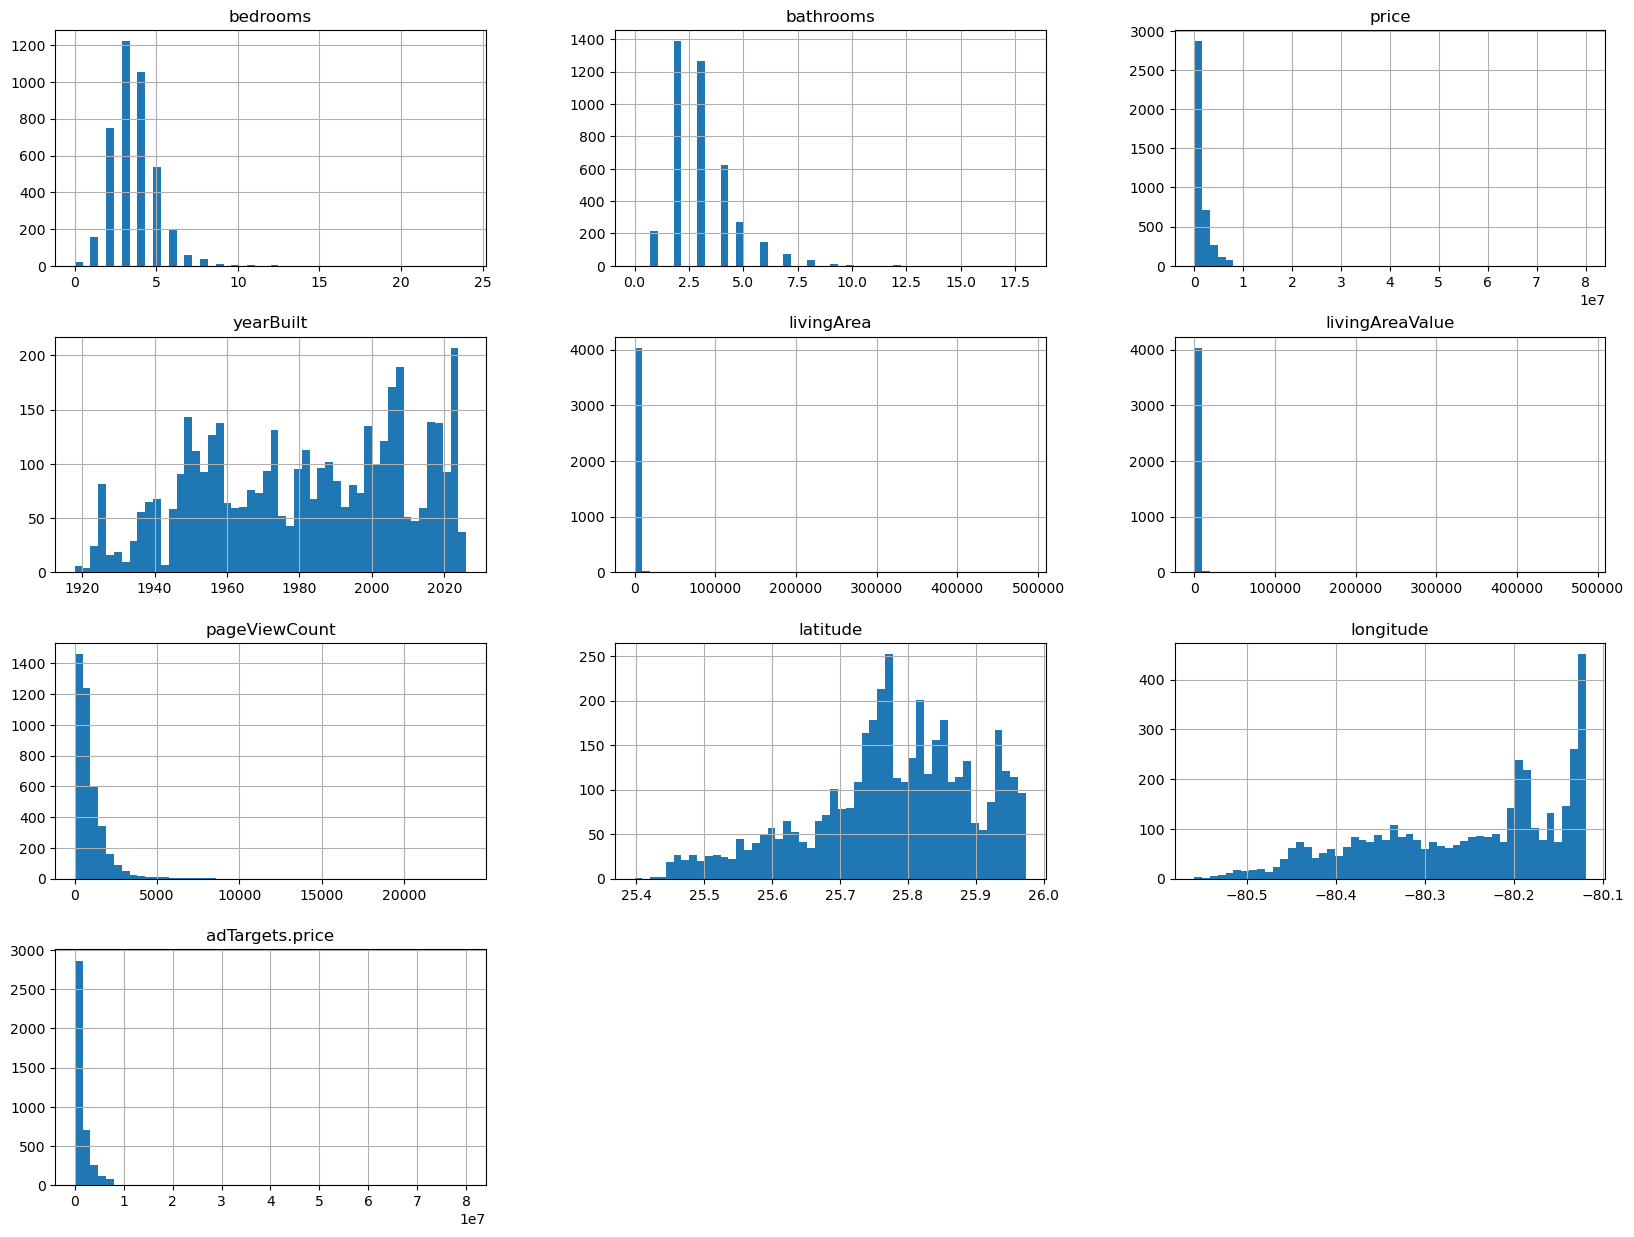

In [10]:
VentaLimpio[['bedrooms', 'bathrooms', 'price', 'yearBuilt',
       'livingArea', 'livingAreaValue','pageViewCount','latitude','longitude','adTargets.price']].hist(bins = 50, figsize = (20, 15))

plt.show()

In [11]:
VentaLimpio

,zpid,bedrooms,bathrooms,price,yearBuilt,zipcode,livingArea,livingAreaValue,pageViewCount,latitude,longitude,adTargets.price,homeType
0,44300222,4.0,3.0,499000,1963.0,33157,1718.0,1718.0,3284.0,25.604727,-80.375960,499000.0,single_family
1,44356167,3.0,2.0,355123,2022.0,33170,1174.0,1174.0,11123.0,25.562920,-80.372790,355123.0,single_family
2,44337096,5.0,3.0,799000,1993.0,33187,2230.0,2230.0,8565.0,25.609274,-80.432780,799000.0,single_family
3,44002262,3.0,2.0,374000,1995.0,33030,845.0,845.0,3220.0,25.471127,-80.487830,374000.0,single_family
4,43895221,5.0,6.0,779000,2018.0,33139,3614.0,3614.0,23779.0,25.793749,-80.158890,779000.0,single_family
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4310,64776150,2.0,2.0,4395000,2004.0,33139,1316.0,1316.0,123.0,25.795609,-80.128160,4395000.0,condo
4311,2062785556,4.0,5.0,4500000,2020.0,33160,3895.0,3895.0,159.0,25.929361,-80.125550,4500000.0,condo
4312,70767524,4.0,5.0,4295000,2005.0,33131,2860.0,2860.0,179.0,25.769053,-80.186710,4295000.0,condo
4314,43864397,5.0,6.0,4282000,2016.0,33133,4121.0,4121.0,539.0,25.710176,-80.258896,4282000.0,single_family


In [12]:
VentaLimpio[['bedrooms', 'bathrooms', 'price', 'yearBuilt',
       'livingArea', 'livingAreaValue','pageViewCount','latitude','longitude','adTargets.price']].describe()


,bedrooms,bathrooms,price,yearBuilt,livingArea,livingAreaValue,pageViewCount,latitude,longitude,adTargets.price
count,4052.000000,4052.000000,4.052000e+03,4052.000000,4052.000000,4052.000000,4052.000000,4052.000000,4052.000000,4.052000e+03
mean,3.541461,3.122409,1.739379e+06,1981.544423,2359.347976,2359.347976,956.865745,25.776285,-80.255720,1.739379e+06
std,1.481894,1.517875,3.270781e+06,28.026414,7721.301089,7721.301089,1111.895050,0.121370,0.109402,3.270781e+06
min,0.000000,0.000000,2.425000e+03,1918.000000,0.000000,0.000000,17.000000,25.397154,-80.559326,2.425000e+03
25%,3.000000,2.000000,6.750000e+05,1957.000000,1375.000000,1375.000000,368.750000,25.710769,-80.342382,6.750000e+05
50%,3.000000,3.000000,9.945000e+05,1983.000000,1896.000000,1896.000000,669.500000,25.781692,-80.226805,9.945000e+05
75%,4.000000,4.000000,1.875000e+06,2006.000000,2689.250000,2689.250000,1188.250000,25.863039,-80.159717,1.875000e+06
max,24.000000,18.000000,8.000000e+07,2026.000000,484900.000000,484900.000000,23779.000000,25.973993,-80.119644,8.000000e+07


In [13]:
VentaLimpio = VentaLimpio[ ( (VentaLimpio['price'] > 1000) & (VentaLimpio['price'] < 1875000) ) & \
                   ( (VentaLimpio['livingArea'] > 100) & (VentaLimpio['livingArea'] < 2690) ) & \
                   ( (VentaLimpio['bedrooms'] > 0) & (VentaLimpio['bedrooms'] < 12) ) & \
                   ( (VentaLimpio['bathrooms'] > 0) & (VentaLimpio['bathrooms'] < 8))  & \
                   ( (VentaLimpio['yearBuilt'] > 1950) & (VentaLimpio['yearBuilt'] < 2003) ) ]

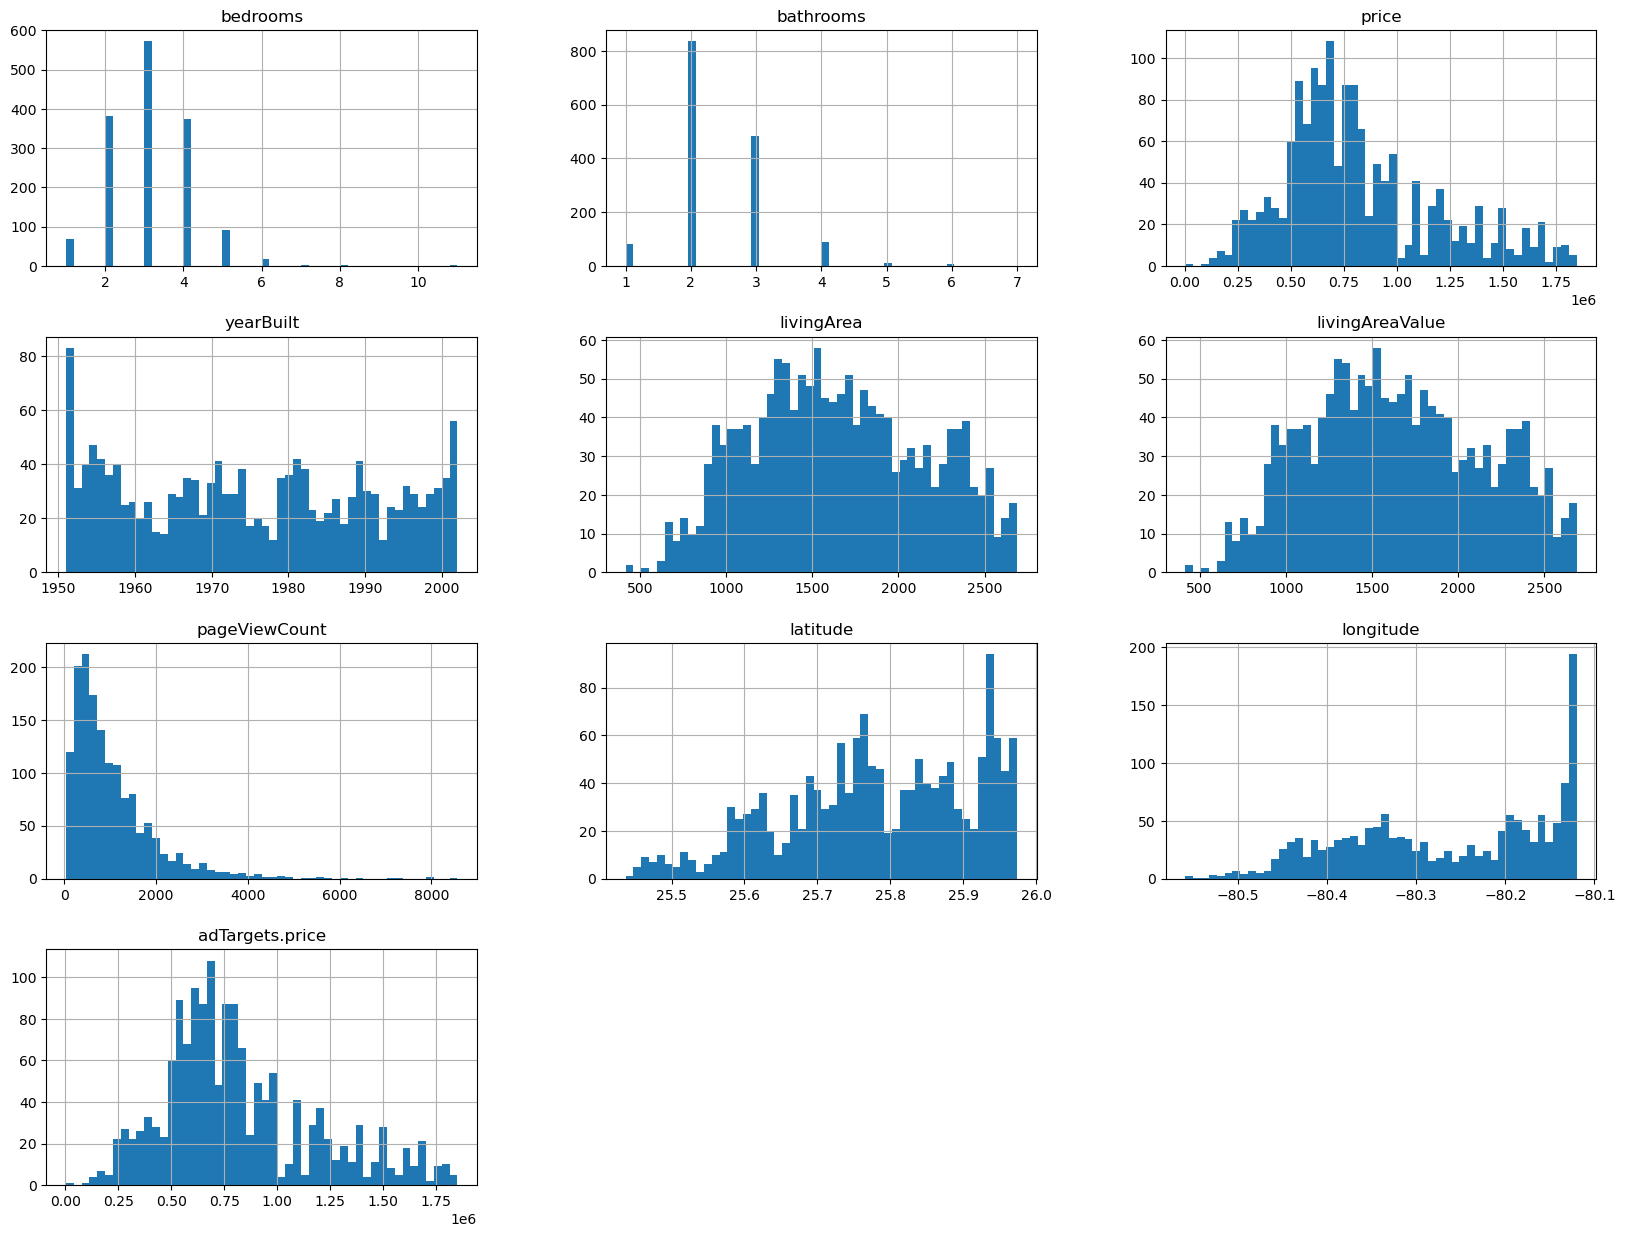

In [14]:
VentaLimpio[['bedrooms', 'bathrooms', 'price', 'yearBuilt',
       'livingArea', 'livingAreaValue','pageViewCount','latitude','longitude','adTargets.price']].hist(bins = 50, figsize = (20, 15))

plt.show()

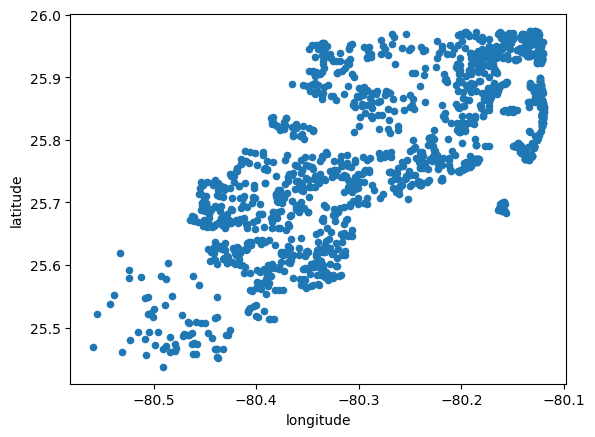

In [15]:
VentaLimpio.plot(kind = 'scatter', x = 'longitude', y = 'latitude')

plt.show()

In [16]:
VentaLimpio.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1511 entries, 0 to 3363
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   zpid             1511 non-null   int64  
 1   bedrooms         1511 non-null   float64
 2   bathrooms        1511 non-null   float64
 3   price            1511 non-null   int64  
 4   yearBuilt        1511 non-null   float64
 5   zipcode          1511 non-null   int64  
 6   livingArea       1511 non-null   float64
 7   livingAreaValue  1511 non-null   float64
 8   pageViewCount    1511 non-null   float64
 9   latitude         1511 non-null   float64
 10  longitude        1511 non-null   float64
 11  adTargets.price  1511 non-null   float64
 12  homeType         1511 non-null   object 
dtypes: float64(9), int64(3), object(1)
memory usage: 165.3+ KB


In [17]:
X = VentaLimpio[["bedrooms", "bathrooms", "livingArea", "livingAreaValue", 'latitude', 'longitude','yearBuilt']]

y = VentaLimpio["price"].values.reshape(-1, 1)

X.shape, y.shape

((1511, 7), (1511, 1))

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 9)

In [19]:
X_scaler = StandardScaler().fit(X_train)
y_scaler = StandardScaler().fit(y_train)

In [20]:
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)

In [21]:
model = LinearRegression()
model.fit(X_train_scaled, y_train_scaled)

LinearRegression()

In [22]:
model.intercept_, model.coef_

(array([-1.77328432e-14]),
 array([[-0.03789305,  0.01560323,  0.31498534,  0.31498534, -0.33229984,
          0.60157168,  0.00653739]]))

In [23]:
predictions = model.predict(X_test_scaled)
predictions

array([[ 2.79385573e-01],
       [ 1.39235160e-01],
       [-1.49029611e+00],
       [-9.81225308e-01],
       [-6.56888117e-01],
       [ 5.17356542e-01],
       [ 2.37715125e-01],
       [ 8.16121842e-01],
       [ 7.91714792e-01],
       [-1.56914520e-01],
       [-1.39223525e-01],
       [ 1.38151977e+00],
       [ 7.35584867e-01],
       [-2.36170697e-02],
       [ 5.64601840e-01],
       [-1.05312013e-01],
       [ 1.95051240e-01],
       [ 6.98070858e-01],
       [-1.64389444e-01],
       [ 6.57238179e-01],
       [-8.75496749e-01],
       [-1.79403362e-01],
       [ 9.13108747e-01],
       [ 6.87693955e-01],
       [ 1.45375474e+00],
       [ 3.86790848e-01],
       [ 2.89936044e-01],
       [ 5.82870120e-01],
       [ 3.10404941e-01],
       [ 1.32235053e+00],
       [ 6.76169864e-01],
       [ 2.11113170e-01],
       [-9.59105822e-01],
       [ 1.27831244e-01],
       [-1.35512866e+00],
       [-1.68899454e-01],
       [ 5.59651716e-01],
       [ 1.40220837e+00],
       [ 9.9

In [24]:
model.score(X_train_scaled, y_train_scaled), model.score(X_test_scaled, y_test_scaled)

(0.4229671484381371, 0.4453132450392545)

In [25]:
lasso = Lasso( alpha = 0.01 )
lasso.fit(X_train_scaled, y_train_scaled)

Lasso(alpha=0.01)

In [26]:
lasso.intercept_, lasso.coef_, model.intercept_, model.coef_

(array([-1.61069233e-14]),
 array([-1.33763768e-02,  2.86009533e-05,  6.09121481e-01,  5.37767340e-16,
        -2.95136948e-01,  5.65441074e-01,  0.00000000e+00]),
 array([-1.77328432e-14]),
 array([[-0.03789305,  0.01560323,  0.31498534,  0.31498534, -0.33229984,
          0.60157168,  0.00653739]]))

In [27]:
predictions = lasso.predict(X_test_scaled)

predictions

array([ 2.78301039e-01,  1.18064679e-01, -1.45577974e+00, -9.51654639e-01,
       -6.04218846e-01,  4.70707010e-01,  2.29986534e-01,  8.36584143e-01,
        7.97372263e-01, -1.30045003e-01, -1.14256503e-01,  1.31091992e+00,
        7.09897513e-01, -5.88908781e-02,  5.39944937e-01, -6.66127940e-02,
        1.65256180e-01,  7.15723681e-01, -1.83606795e-01,  6.34103902e-01,
       -8.29199592e-01, -1.78317868e-01,  8.99589012e-01,  6.14702313e-01,
        1.36980572e+00,  3.48291809e-01,  2.50165205e-01,  5.32742012e-01,
        3.33300375e-01,  1.27943931e+00,  6.40610093e-01,  2.01016397e-01,
       -9.54584350e-01,  1.21520759e-01, -1.29955316e+00, -1.30926899e-01,
        5.68069504e-01,  1.32196400e+00,  9.56716229e-01,  4.44960607e-01,
       -8.95858038e-01, -9.95855117e-01,  5.40747486e-02,  2.35133071e-02,
        3.16320883e-01,  5.77676211e-01, -4.07368914e-01, -1.15306169e-01,
        4.77686034e-01, -3.31209165e-01, -1.36165327e-02,  2.80771455e-01,
        1.62327490e-01,  

In [28]:
lasso.score(X_train_scaled, y_train_scaled), lasso.score(X_test_scaled, y_test_scaled)

(0.4215609628684108, 0.4423218186607384)

In [29]:
model.score(X_train_scaled, y_train_scaled), model.score(X_test_scaled, y_test_scaled)

(0.4229671484381371, 0.4453132450392545)

In [41]:
X = VentaLimpio[["bedrooms", "bathrooms", "livingArea", "livingAreaValue", 'latitude', 'longitude','yearBuilt']]

y = VentaLimpio["price"].values.reshape(-1, 1)

X.shape, y.shape

((1511, 7), (1511, 1))

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 9)

In [43]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [44]:
model.intercept_, model.coef_

(array([1.77642451e+08]),
 array([[-1.28181286e+04,  7.27621205e+03,  2.26823737e+02,
          2.26823737e+02, -9.29339735e+05,  1.91722908e+06,
          1.50762163e+02]]))

In [46]:
predictions = model.predict(X_test)
predictions

array([[ 914588.4032428 ],
       [ 864148.04079142],
       [ 277677.07721099],
       [ 460892.48911631],
       [ 577621.97372338],
       [1000234.54346538],
       [ 899591.1409016 ],
       [1107760.66274402],
       [1098976.52559847],
       [ 757563.28739813],
       [ 763930.30556253],
       [1311248.30142865],
       [1078775.27394065],
       [ 805537.25748208],
       [1017238.20362198],
       [ 776135.11382881],
       [ 884236.3390995 ],
       [1065273.92110121],
       [ 754873.04999188],
       [1050578.17306584],
       [ 498944.37002099],
       [ 749469.51659471],
       [1142666.40823054],
       [1061539.25656825],
       [1337245.78327018],
       [ 953243.73714805],
       [ 918385.53516772],
       [1023812.98721737],
       [ 925752.32462999],
       [1289953.19537437],
       [1057391.71754062],
       [ 890017.05414844],
       [ 468853.32797596],
       [ 860043.75298843],
       [ 326324.06311592],
       [ 753249.89004761],
       [1015456.64579195],
 

In [47]:
model.score(X_train, y_train), model.score(X_test, y_test)

(0.42296714843813565, 0.44531324503925096)

In [48]:
predictionslm = model.predict(X)
predictionslm

array([[ 793701.63289273],
       [ 904511.21115604],
       [ 317713.06559372],
       ...,
       [1301543.57617623],
       [ 952122.21717757],
       [ 754775.68700993]])

In [32]:
VentaLimpio.index.dtype

dtype('int64')

In [49]:
VentaLimpio = VentaLimpio.reindex(columns=['bedrooms', 'bathrooms', 'price', 'yearBuilt',
       'livingArea', 'livingAreaValue','pageViewCount','latitude','longitude','adTargets.price','predictionslm'])

In [50]:
VentaLimpio

,bedrooms,bathrooms,price,yearBuilt,livingArea,livingAreaValue,pageViewCount,latitude,longitude,adTargets.price,predictionslm
0,4.0,3.0,499000,1963.0,1718.0,1718.0,3284.0,25.604727,-80.375960,499000.0,1038.157426
2,5.0,3.0,799000,1993.0,2230.0,2230.0,8565.0,25.609274,-80.432780,799000.0,1360.824952
3,3.0,2.0,374000,1995.0,845.0,845.0,3220.0,25.471127,-80.487830,374000.0,488.401604
6,4.0,2.0,645000,1967.0,1645.0,1645.0,3691.0,25.603306,-80.367510,645000.0,992.185668
7,4.0,3.0,550000,1984.0,1306.0,1306.0,8040.0,25.564627,-80.351070,550000.0,778.775088
...,...,...,...,...,...,...,...,...,...,...,...
3354,3.0,3.0,1520000,1995.0,2340.0,2340.0,87.0,25.928467,-80.123690,1520000.0,1430.290460
3355,2.0,3.0,1595000,1990.0,2154.0,2154.0,113.0,25.938690,-80.135210,1595000.0,1313.110791
3356,4.0,4.0,1750000,1970.0,2532.0,2532.0,259.0,25.769474,-80.228170,1750000.0,1551.049087
3357,2.0,2.0,1695000,1981.0,1440.0,1440.0,126.0,25.790000,-80.148735,1695000.0,863.278558


In [51]:
VentaLimpio['predictionslm']=predictionslm

In [52]:
VentaLimpio['predictionslm']=predictionslm

,bedrooms,bathrooms,price,yearBuilt,livingArea,livingAreaValue,pageViewCount,latitude,longitude,adTargets.price,predictionslm
0,4.0,3.0,499000,1963.0,1718.0,1718.0,3284.0,25.604727,-80.375960,499000.0,7.937016e+05
2,5.0,3.0,799000,1993.0,2230.0,2230.0,8565.0,25.609274,-80.432780,799000.0,9.045112e+05
3,3.0,2.0,374000,1995.0,845.0,845.0,3220.0,25.471127,-80.487830,374000.0,3.177131e+05
6,4.0,2.0,645000,1967.0,1645.0,1645.0,3691.0,25.603306,-80.367510,645000.0,7.714334e+05
7,4.0,3.0,550000,1984.0,1306.0,1306.0,8040.0,25.564627,-80.351070,550000.0,6.949512e+05
...,...,...,...,...,...,...,...,...,...,...,...
3354,3.0,3.0,1520000,1995.0,2340.0,2340.0,87.0,25.928467,-80.123690,1520000.0,1.276308e+06
3355,2.0,3.0,1595000,1990.0,2154.0,2154.0,113.0,25.938690,-80.135210,1595000.0,1.172407e+06
3356,4.0,4.0,1750000,1970.0,2532.0,2532.0,259.0,25.769474,-80.228170,1750000.0,1.301544e+06
3357,2.0,2.0,1695000,1981.0,1440.0,1440.0,126.0,25.790000,-80.148735,1695000.0,9.521222e+05


In [53]:
VentaLimpio['menor']=VentaLimpio['predictionslm']-VentaLimpio['price']

In [54]:
VentaLimpio

,bedrooms,bathrooms,price,yearBuilt,livingArea,livingAreaValue,pageViewCount,latitude,longitude,adTargets.price,predictionslm,menor
0,4.0,3.0,499000,1963.0,1718.0,1718.0,3284.0,25.604727,-80.375960,499000.0,7.937016e+05,294701.632893
2,5.0,3.0,799000,1993.0,2230.0,2230.0,8565.0,25.609274,-80.432780,799000.0,9.045112e+05,105511.211156
3,3.0,2.0,374000,1995.0,845.0,845.0,3220.0,25.471127,-80.487830,374000.0,3.177131e+05,-56286.934406
6,4.0,2.0,645000,1967.0,1645.0,1645.0,3691.0,25.603306,-80.367510,645000.0,7.714334e+05,126433.381475
7,4.0,3.0,550000,1984.0,1306.0,1306.0,8040.0,25.564627,-80.351070,550000.0,6.949512e+05,144951.234648
...,...,...,...,...,...,...,...,...,...,...,...,...
3354,3.0,3.0,1520000,1995.0,2340.0,2340.0,87.0,25.928467,-80.123690,1520000.0,1.276308e+06,-243692.185941
3355,2.0,3.0,1595000,1990.0,2154.0,2154.0,113.0,25.938690,-80.135210,1595000.0,1.172407e+06,-422593.417345
3356,4.0,4.0,1750000,1970.0,2532.0,2532.0,259.0,25.769474,-80.228170,1750000.0,1.301544e+06,-448456.423824
3357,2.0,2.0,1695000,1981.0,1440.0,1440.0,126.0,25.790000,-80.148735,1695000.0,9.521222e+05,-742877.782822


In [55]:
VentaBaratos= VentaLimpio[ (VentaLimpio['menor'] >0) ]

In [56]:
VentaBaratos

,bedrooms,bathrooms,price,yearBuilt,livingArea,livingAreaValue,pageViewCount,latitude,longitude,adTargets.price,predictionslm,menor
0,4.0,3.0,499000,1963.0,1718.0,1718.0,3284.0,25.604727,-80.37596,499000.0,7.937016e+05,294701.632893
2,5.0,3.0,799000,1993.0,2230.0,2230.0,8565.0,25.609274,-80.43278,799000.0,9.045112e+05,105511.211156
6,4.0,2.0,645000,1967.0,1645.0,1645.0,3691.0,25.603306,-80.36751,645000.0,7.714334e+05,126433.381475
7,4.0,3.0,550000,1984.0,1306.0,1306.0,8040.0,25.564627,-80.35107,550000.0,6.949512e+05,144951.234648
9,4.0,2.0,430000,2000.0,1702.0,1702.0,602.0,25.473180,-80.47912,430000.0,7.092158e+05,279215.763200
...,...,...,...,...,...,...,...,...,...,...,...,...
2582,4.0,3.0,1050000,1993.0,2676.0,2676.0,302.0,25.618605,-80.44120,1050000.0,1.094841e+06,44841.374837
2605,3.0,5.0,1175000,1985.0,2470.0,2470.0,269.0,25.941587,-80.13487,1175000.0,1.314699e+06,139699.229556
2613,3.0,2.0,1211000,1961.0,2358.0,2358.0,231.0,25.853498,-80.18078,1211000.0,1.232288e+06,21288.405212
2792,4.0,4.0,1250000,1972.0,2654.0,2654.0,1159.0,25.761417,-80.22305,1250000.0,1.374494e+06,124493.995392
